In [1]:
import polyfingerprints as pfp
import pandas as pd
import numpy as np
from wrapconfig import YAMLWrapConfig

In [2]:
RAW_CSV_PATH =  "./cloud_points_data.csv"

In [3]:
raw_df = pd.read_csv(RAW_CSV_PATH, sep=";", decimal=",")
raw_df

,reference,polymer_type,polymer_type_style,polymer_architecture,polymerisation_type,SMILES_start_group,SMILES_end_group,SMILES_repeating_unitA,molpercent_repeating_unitA,SMILES_repeating_unitB,...,additive2_concentration_molar,additive2_concentration_weight_percent,cloud_point,N/A,def_type,pH,identifier,comment,tacticity,rating
0,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,32.1,NaN,A,NaN,PNIPAM-co-AA,NaN,NaN,NaN
1,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,43.0,NaN,A,NaN,PNIPAM-cycloprop-7.5,NaN,NaN,NaN
2,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,44.0,NaN,A,NaN,PNIPAM-cyclobut-7.5,NaN,NaN,NaN
3,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,45.5,NaN,A,NaN,PNIPAM-cyclopent-7.5,NaN,NaN,NaN
4,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,43.0,NaN,A,NaN,PNIPAM-cyclohept-7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2]CCCCCCCCCCCCCCC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,51.7,NaN,C,NaN,P15,632 nm,NaN,NaN
907,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,50.3,NaN,C,NaN,P16,632 nm,NaN,NaN
908,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S]SC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,48.9,NaN,C,NaN,P17,632 nm,NaN,NaN
909,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,48.9,NaN,C,NaN,P18,632 nm,NaN,NaN


In [4]:
raw_df["pH"] = raw_df["pH"].fillna(7)
DEF_TYPE_MAP = {
        "A": 0.1,
        "B": 0.2,
        "C": 0.5,
        "DSC": 0.01,
    }
raw_df["def_type"] = raw_df["def_type"].fillna("0.1")
raw_df["def_type"] = raw_df["def_type"].apply(
    lambda x: float(
        (DEF_TYPE_MAP[x] if x in DEF_TYPE_MAP else str(x).replace(",", "."))
    ),
)

# set poly_conc to polymer_concentration_mass_conc where it is NaN
if "polymer_concentration_mass_conc" in raw_df.columns:
    raw_df["polymer_concentration_wpercent"] = raw_df["polymer_concentration_wpercent"].fillna(raw_df["polymer_concentration_mass_conc"])
    raw_df= raw_df.drop(
        ["polymer_concentration_mass_conc"], axis=1
    )

df,info = pfp.datareader.expand_data(
    raw_df,
    ignored_columns=["reference",
        "polymer_type",
        "polymer_type_style",
        "polymer_architecture",
        "polymerisation_type",
        "Mw",
        "PDI",
        "mass_characterisation_method",
        "mass_characterisation_standart",
        "N/A",
        "identifier",
        "comment",
        "tacticity",
        "rating",],
    density=1,
additive_wp_column_postfix = "_concentration_weight_percent",
    additive_conc_column_postfix="_concentration_molar"


)

df.to_csv("expanded_data.csv")
infofile = YAMLWrapConfig("expanded_info.yml")
infofile.set_data(info)
infofile.save()
df

[15:41:25] WARNING: not removing hydrogen atom without neighbors
[15:41:25] WARNING: not removing hydrogen atom without neighbors
[15:41:25] WARNING: not removing hydrogen atom without neighbors
[15:41:25] WARNING: not removing hydrogen atom without neighbors


,SMILES_start_group,SMILES_end_group,SMILES_repeating_unitA,molpercent_repeating_unitA,SMILES_repeating_unitB,molpercent_repeating_unitB,SMILES_repeating_unitC,molpercent_repeating_unitC,SMILES_repeating_unitD,molpercent_repeating_unitD,...,additive_24,additive_25,additive_26,additive_27,additive_28,additive_29,additive_30,additive_31,additive_32,additive_33
0,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.200,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CCC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CCCC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CCCCCC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2]CCCCCCCCCCCCCCC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S]SC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
909,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Data analysis with matplotlib, seaborn and plotly - dash
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [6]:
# create a depiction of all the amount of all smiles strings
c = df["SMILES_repeating_unitA"].value_counts(normalize=True)
print("number or different constitutional/repeating units: {}".format(len(c)))
# threshold for strings which are only present in less than a specific percentage of the data
frequent_strings = []
perc = 0
for s,p in zip(c.index,c.values):
    if perc < 0.95:
        perc += p
        frequent_strings.append(s)
    else:
        break
c = c.head(len(frequent_strings))

# create a list of percentages strings for each SMILES string
percentage_list = [str(perc_num) for perc_num in (np.around(c.values*100, decimals=1))]

figure = px.bar(
    x=c.index,
    y=c.values,
    title="Distribution of constitutional/repeating units",
    labels={"x": "SMILES string", "y": "Number of entries [%]"},
    height=900,
    text=percentage_list, # annotates each bar with its
)

# set lable angles diagonally
figure.update_traces(textangle=-70)
figure.update_layout(font_family = "Calibri")
figure.update_xaxes(tickangle=-70)

#creating a string for the information that was left out for better visibility
information = "Minority share = %.2f%% <br> (showing %.2f%% of all structures)"  %((1-perc)*100, perc*100)
figure.add_annotation(text=information,
                      showarrow=False,
                      bgcolor="lightblue",
                      xanchor="left",
                      y=0.2,
                      x=1
                      )

# figure.show()
print("Not printing the standard jupyter output (which would be the plot) to save resources.")

number or different constitutional/repeating units: 47
Not printing the standard jupyter output (which would be the plot) to save resources.


In [7]:
# plot the distribution of the important polymer property - here the cloud point
figure = px.histogram(
    x=df["cloud_point"],
    title="Distribution of cloud points",
    labels={"x": "Cloud point [°C]", "y": "Number of entries"},
    nbins=100,
)
figure.update_layout(font_family = "Calibri")
# figure.show()
print("Not printing the standard jupyter output (which would be the plot) to save resources.")

Not printing the standard jupyter output (which would be the plot) to save resources.


In [8]:
# two sunburst charts to show which definitions for the cloud point are set how many times
# we create the list of the different definitions and their counts

fig = px.sunburst(raw_df, path=["def_type","reference"])
fig.update_layout(
    font_size=14,
    title={
        'text': "Definition Type",
        'y':0.9,
        'x':0.5,
        "font_size":35,
        'xanchor': 'center',
        'yanchor': 'bottom'},
)
description = "0.5 = ideally the inflection point <br>" \
              "0.2 = empirically the intersection of baseline and tangent to the inflection point <br>" \
              "0.1 = often declared as first appearance of cloudiness <br>" \
              "0.05 = just chosen by the authors <br>" \
              "0.01 = found to be the first the onset value specifically determined through DSC"

fig.add_annotation(text=description,
                    align='left',
                    showarrow=False,
                    yanchor="bottom",
                    xref='paper',
                    yref='paper',
                    x=0.5,
                    y=-.26,

                    borderwidth=1)
# fig.show()
print("Not printing the plot to save resources.")

Not printing the plot to save resources.


C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, '$T_{CP}$  Definition types')

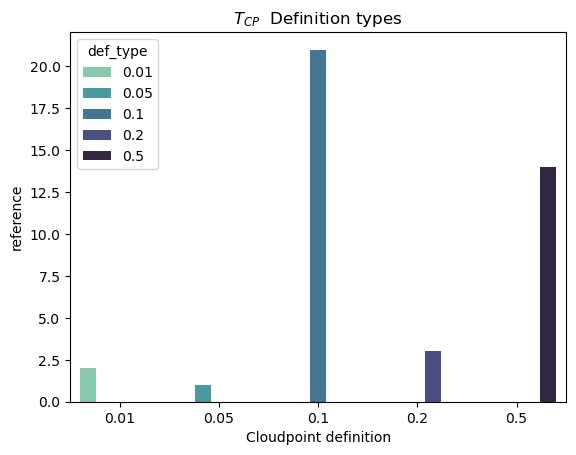

In [9]:
# a similar more straight forward option than above
reference_count = raw_df.groupby("def_type") ["reference"].nunique().reset_index()
sns.barplot(data= reference_count, x="def_type", y="reference", palette="mako_r", hue="def_type")
plt.xlabel("Cloudpoint definition")
plt.title("$T_{CP}$  Definition types")

# save option
# plt.savefig(fname=os.path.join(base_path, "{} over {}".format(y.name, x.name)), dpi=600, bbox_inches="tight")

770 cloud_point and 770 Mn used


C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Nex\mambaforge\envs\PFP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated 

from 858 overall entries 858 cloudpoints and 858 masses were used 
which after exclusion of those masses over 45000 g/mol gave 770 points to plot


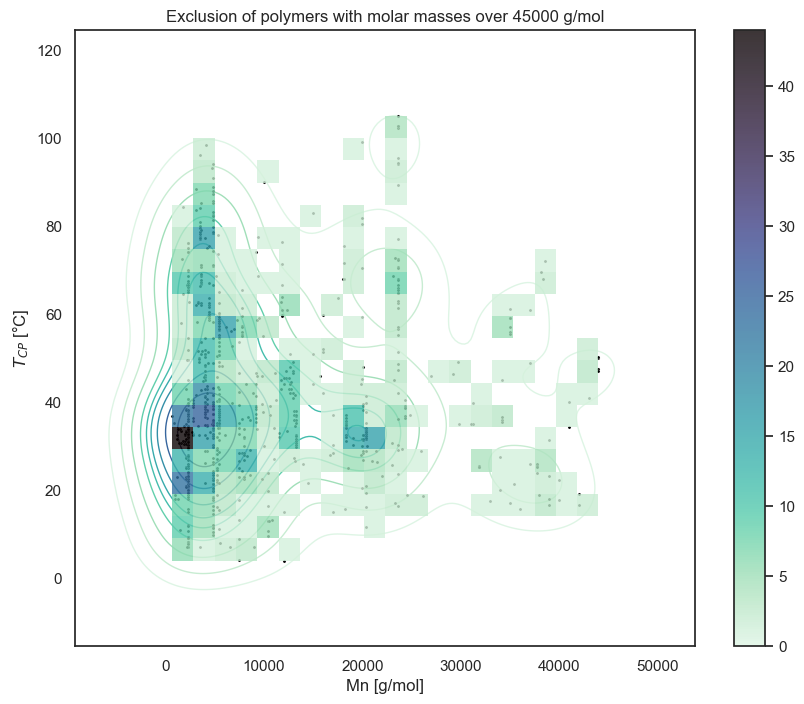

In [10]:
sns.set_theme(style="white", palette=None)
df2 = df[["cloud_point", "Mn"]]
df2 = df2.dropna()
smaller_Mn = df2[df2["Mn"] > 45000].index
df2.drop(smaller_Mn, inplace=True)
y, x= (df2["cloud_point"], df2["Mn"])
print("{} {} and {} {} used".format(len(y), y.name, len(x), x.name))

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x, y=y, s=5, color="black")
sns.kdeplot(x=x, y=y, levels=10, color="w", linewidths=1, zorder=0, fill=False, cmap="mako_r")
sns.histplot(x=x, y=y, bins=20, alpha=0.8, cmap="mako_r", cbar=True)
plt.xlabel("Mn [g/mol]")
plt.ylabel("$T_{CP}$ [°C]")


plt.title("Exclusion of polymers with molar masses over 45000 g/mol")
print("from {} overall entries {} cloudpoints and {} masses were used \n"
      "which after exclusion of those masses over 45000 g/mol gave {} points to plot"
    .format(len(df), len(df["cloud_point"].dropna()) , len( df["Mn"].dropna()), len(x)))

# save option
# plt.savefig(fname=os.path.join(base_path, "{} over {}".format(y.name, x.name)), dpi=600, bbox_inches="tight")

[C](C)(C)(C#N)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)O)[CH2][CH](C(=O)NC1CC1)[C](C)(C)C#N


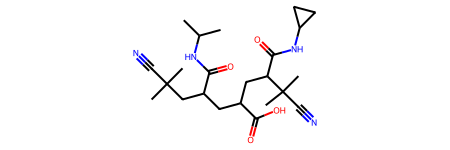

In [11]:
import rdkit.Chem as Chem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import display, SVG
import ipywidgets as widgets

# lastly show representations of all polymer styles
smiles_df = df[["SMILES_start_group", "SMILES_end_group"] + info["repeating_unit_columns"]].drop_duplicates().reset_index()

#sort the columns to concatenate them to unique strings
cols = smiles_df.columns.tolist()
cols = [cols[1]] + cols[3:] + [cols[2]] # D is empty anyway
smiles_df = smiles_df[cols]
# dropping every empty rep unit argument and concatenating it to a string before creating the mol datatype of rdkit
all_poly_smiles = np.array([smiles_df.iloc[n].dropna().str.cat() for n in smiles_df.index])
all_poly_pics = np.array([Chem.MolFromSmiles(smiles_df.iloc[n].dropna().str.cat()) for n in smiles_df.index])
all_polys = np.vstack((all_poly_smiles, all_poly_pics)).T
# now all polymer strings and their respective rdkit mol object are stored, the first is shown below
print(all_polys[1,0])
display(all_polys[1,1])

In [12]:
# interactive display to look at all representations
def smi_to_svg(smi, size):
    mol = all_polys_dict[smi]
    structure_graphic = rdMolDraw2D.MolDraw2DSVG(size, size)
    rdMolDraw2D.PrepareAndDrawMolecule(structure_graphic, mol)
    structure_graphic.FinishDrawing()
    display(SVG(structure_graphic.GetDrawingText()))

# Dropdown widget options
Smiles_input = widgets.Dropdown(options=all_poly_smiles, description="Representation")
Size_input = widgets.Dropdown(options=[*range(50,1000, 100)], description="Scale")

all_polys_dict={}
for pair in  all_polys:
    all_polys_dict[pair[0]]=pair[1]

# Define a function to handle changes in dropdown values
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        input1 = Smiles_input.value
        input2 = Size_input.value
        smi_to_svg(input1, input2)

# Attach the on_change function to dropdowns
Smiles_input.observe(on_change)
Size_input.observe(on_change)

# Display the dropdown widgets
display(Smiles_input, Size_input)

Dropdown(description='Representation', options=('[C](C)(C)(C#N)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)O)[C](C)(C…

Dropdown(description='Scale', options=(50, 150, 250, 350, 450, 550, 650, 750, 850, 950), value=50)

In [27]:
# diversity and comparability of the structures
# first the PFP is created
# get an estimate of how much information of the fingerprint is comparable and how much just leads to linear regression in the system. Comparable means that the fingerprint vector positions are not unique to a fingerprint structure but group 50% of the dataset

additional_columns=infofile["numerical_columns"]+infofile["categorical_columns"]
y=["cloud_point"]

DEFAULT_PFPDATA={
    "intersection_fp_size":256,
    "enhanced_sum_fp_size":256,
}

def create_pfp_vec_set(size=DEFAULT_PFPDATA):
    hyperparameter=YAMLWrapConfig("hyperparameter.yml")
    hyperparameter["pfp_data"].update(size)
    pfpdata = pfp.loader.df_loader(
            df=df,
            repeating_unit_columns=tuple(
                zip(
                    infofile["repeating_unit_columns"],
                    infofile["molpercent_repeating_unit_columns"],
                )
            ),
            y=y,
            mw_column="Mn",
            start_group_column="SMILES_start_group",
            end_group_column="SMILES_end_group",
            additional_columns= additional_columns,
            intersection_fp_size=hyperparameter["pfp_data"]["intersection_fp_size"],
            enhanced_sum_fp_size=hyperparameter["pfp_data"]["enhanced_sum_fp_size"]
        )
    pfpdata, reduce_fp_data_info = pfp.reduce_pfp_in_dataset(pfpdata)

    # get all pfp.vectors to one twodimensional numpy for easy modification

    # def get_comparability_of_fingerprints(pfpdata):
    pfp_vec_set = []
    for row_idx in range(len(pfpdata)):
        pfp_vec_set.append(np.array(pfpdata[row_idx]["pfp"]))
    pfp_vec_set = np.array(pfp_vec_set)
    return pfp_vec_set

def sum_and_normalize(pfp_vec_set):
    # set everything that is not 0 to 1
    pfp_vec_set[pfp_vec_set > 0] = 1
    number_of_fingerprints, length_of_fingerprint = pfp_vec_set.shape
    pfp_vec_sum = pfp_vec_set.sum(axis=0)

    # Flip the positions with more 1 than zeros as 1 states the average
    flipper = lambda i: number_of_fingerprints-i if i > number_of_fingerprints/2 else i
    flipped_pfp_vec_sum = np.array([flipper(i) for i in pfp_vec_sum])

    # normalize and multiply by 100 to get a percentage of how many polymers have the same information at a certain position
    normalized_pfp_vec_sum = flipped_pfp_vec_sum/(number_of_fingerprints/2)*100

    return np.sort(normalized_pfp_vec_sum)

In [28]:
# create 3 sets of different FP size to see the change in comparability to get an estimate about the right
# size/effectiveness ratio of the FP length
pfp_vec = create_pfp_vec_set()
sorted_normalized_pfp_vec_sum = sum_and_normalize(pfp_vec)
pfp_vec_set = [pfp_vec]
sorted_normalized_pfp_vec_sum_set = [sorted_normalized_pfp_vec_sum]
for size in ([2,4]):
    fp_size={
        "intersection_fp_size":256*size,
        "enhanced_sum_fp_size":256*size}
    current_set = create_pfp_vec_set(fp_size)
    pfp_vec_set.append(current_set)
    sorted_normalized_pfp_vec_sum_set.append(sum_and_normalize(current_set))

Creating Polyfingerprints: 100%|██████████| 858/858 [00:08<00:00, 106.12it/s]
2023-11-28 16:08:21,260 - polyfingerprints - INFO - reduced size by 1%
Creating Polyfingerprints: 100%|██████████| 858/858 [00:09<00:00, 91.12it/s] 
2023-11-28 16:08:32,418 - polyfingerprints - INFO - reduced size by 7%
Creating Polyfingerprints: 100%|██████████| 858/858 [00:12<00:00, 71.29it/s] 
2023-11-28 16:08:46,269 - polyfingerprints - INFO - reduced size by 20%


In [29]:
print(pfp_vec)
print("\n")
print([len(set[1]) for set in pfp_vec_set])

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 1.]]


[1263, 2384, 4078]


In [95]:
fig = go.Figure()
fingerprint_length = [len(set[1]) for set in pfp_vec_set]
for set, set_name in zip(sorted_normalized_pfp_vec_sum_set, fingerprint_length):
    fig.add_trace(go.Violin(y=set, name=set_name))

fig.update_layout(title="Comparability of the fingerprints",
                 xaxis_title = "Fingerprint position", yaxis_title = "Comparability [%]",
                  yaxis_zeroline=False
)
fig.update_traces(box_visible=True, meanline_visible=True)
fig.show()

In [16]:
# two ways to depict the raw data, more can be easily found and applied with the plotly documentation via google
fig = px.scatter(np.cumsum(pfp_vec.mean(0))/np.arange(1,len(pfp_vec[0])+1), title="Comparability of the fingerprints",
                 labels={"index": "Fingerprint position", "value": "Comparability [%]"},
                 width=500, height=500)
fig.add_trace(go.Scatter(y=pfp_vec.mean(0), mode="markers", name="50%"))
fig.update_layout(showlegend=True)
fig.show()

In [27]:
from tqdm import tqdm
'''
Between two fingerprints:
Hamming distance is the number of differences.
Jaccard index/similarity coefficient is the number of common bits divided by the total number of bits. (= Cosine similarity)
Sørensen–Dice coefficient is the number of common bits times two divided by the sum of all positive bits in both fingerprint.
Euclidean distance is the length between two points calculated with the pythagorean theorem.
'''
# the Tanimoto coefficient now is like the Jaccard index but for the actual structures unreadable by the neural network.
def hamming_distance(fp1, fp2):
    return np.sum(fp1 != fp2)

def jaccard_index(fp1, fp2):
    intersection = np.sum(np.logical_and(fp1, fp2))
    union = np.sum(np.logical_or(fp1, fp2))
    return intersection/union

def sorensen_dice_coefficient(fp1, fp2):
    intersection = np.sum(np.logical_and(fp1, fp2))*2
    total_elements = np.sum(fp1, fp2)
    return intersection/total_elements

def euclidean_distance(fp1,fp2):
    return np.linalg.norm(fp1 -fp2)

def calculate_similarity(fp_set, similarity_function):
    set_length = len(fp_set)
    similarity = 0
    pairs = 0
    for i in tqdm(range(set_length-1), desc=similarity_function.__name__):
        for j in range(i+1, set_length):
            similarity += similarity_function(fp_set[i], fp_set[j])
            pairs += 1
    average_similarity = similarity/pairs
    return average_similarity


3.0